In [ ]:
# ALDO's CODE ##
# Importing Dependencies and Setup
# We don't know what we need, so we'll import a bunch of different modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import random as random
from scipy.stats import linregress
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [ ]:
# Load CSV file and turn it into PD DataFrames
goOne_df = pd.read_csv("/Users/mdcummings/Desktop/Data Analysis/Boot Camp/Project 1/goemotions_1.csv")
goTwo_df = pd.read_csv("/Users/mdcummings/Desktop/Data Analysis/Boot Camp/Project 1/goemotions_2.csv")
goThree_df = pd.read_csv("/Users/mdcummings/Desktop/Data Analysis/Boot Camp/Project 1/goemotions_3.csv")

In [ ]:
# Merge the three separate DataFrames into one.
dfMerge = goOne_df.merge(goTwo_df, how='outer')
dfMerge = dfMerge.merge(goThree_df, how='outer')

# Convert column into DateTime datatype, and apply the correct unit (seconds) to turn it readable.
dfMerge['created_utc'] = dfMerge['created_utc'].astype('datetime64[s]')
dfMerge

In [129]:
# Clean DataFrame by: 1.# Dropping columns, 2.) Choosing "Clear" selections, 3.) Dropping the "example_very_unclear" column after selection
dfStaging = dfMerge.drop(columns=['id', 'author', 'link_id', 'parent_id'])
dfStagingA = dfStaging.loc[(dfStaging['example_very_unclear'] == False)]
dfClean = dfStagingA.drop(columns=['example_very_unclear'])
dfClean
# dfClean will have "clear" examples

,text,subreddit,created_utc,rater_id,admiration,amusement,anger,annoyance,approval,caring,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,nrl,2019-01-25 01:50:39,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,"You do right, if you don't care then fuck 'em!",confessions,2019-01-02 11:15:44,37,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,facepalm,2019-01-20 06:17:34,18,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",starwarsspeculation,2019-01-05 06:10:01,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,Right? Considering it’s such an important docu...,TrueReddit,2019-01-23 21:50:08,61,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,"Well, I'm glad you're out of all that now. How...",raisedbynarcissists,2019-01-04 15:22:34,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211220,Everyone likes [NAME].,heroesofthestorm,2019-01-16 10:25:22,16,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
211221,Well when you’ve imported about a gazillion of...,nottheonion,2019-01-27 01:39:42,15,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
211222,That looks amazing,shittyfoodporn,2019-01-17 00:08:54,70,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Clean DataFrame by: 1.# Dropping columns, 2.) Choosing "Unclear" selections, 3.) Dropping the "example_very_unclear" column after selection
# Same as above; 
dfStagingB = dfStaging.loc[(dfStaging['example_very_unclear'] == True)]
dfEVUClean = dfStagingB.drop(columns=['example_very_unclear'])
dfEVUClean
# dfEVUClean will have "unclear" examples

In [ ]:
dfEVUTrue = dfMerge.loc[dfMerge['example_very_unclear'] == True]

In [ ]:
subS = goOne_df.pivot_table(index = ['subreddit'], aggfunc ='size')
subS.sort_values(inplace=True)
subS

In [ ]:
sub_G1 = goOne_df.loc[(goOne_df['subreddit'] == 'AnimalsBeingBros') | (goOne_df['subreddit'] == 'cringe') | (goOne_df['subreddit'] == 'socialanxiety') & (goOne_df['example_very_unclear'] == True), :]
sub_G1.drop(columns=['author', 'id', 'link_id', 'parent_id', 'created_utc', 'example_very_unclear'])

In [ ]:
sub_ABB = sub_G1.loc[(sub_G1['subreddit'] == 'AnimalsBeingBros')]
sub_ABB.drop(columns=['author', 'id', 'link_id', 'parent_id', 'created_utc', 'example_very_unclear', 'rater_id'], inplace=True)
sub_ABB.reset_index(inplace=True, drop=True)
ABBad = sub_ABB.admiration()
ABB = len(sub_ABB.index)
print(f"AnimalsBeingBros has {ABB} comments and {ABBad} admirations")

In [ ]:
sub_ABB

In [ ]:
sub_Cri = sub_G1.loc[(sub_G1['subreddit'] == 'cringe')]
sub_Cri.drop(columns=['author', 'id', 'link_id', 'parent_id', 'created_utc', 'example_very_unclear', 'rater_id']).reset_index(inplace=True, drop=True)
sub_ABB

In [ ]:
sub_ABB.drop(columns=['text', 'subreddit'], inplace=True)

In [ ]:
sub_ABB

In [271]:
# Begin Michael's Code ##
# applying Numpy.select to the clean dataframe which will scan selected columns based on conditions and output the sentiments for each emotion selected
# https://www.youtube.com/watch?v=lnks1IcoHUo&list=PLLoWLLJ3lqKau9ifzxg0oo2y3I3ybv3ed&index=12
emo_conditions = [
    (dfClean['amusement'] == 1),
    (dfClean['excitement'] == 1),
    (dfClean['joy'] == 1),
    (dfClean['love'] == 1),
    (dfClean['desire'] == 1),
    (dfClean['optimism'] == 1),
    (dfClean['caring'] == 1),
    (dfClean['pride'] == 1),
    (dfClean['admiration'] == 1),
    (dfClean['gratitude'] == 1),
    (dfClean['relief'] == 1),
    (dfClean['approval'] == 1),
    (dfClean['realization'] == 1),
    (dfClean['surprise'] == 1),
    (dfClean['curiosity'] == 1),
    (dfClean['confusion'] == 1),
    (dfClean['fear'] == 1),
    (dfClean['nervousness'] == 1),
    (dfClean['remorse'] == 1),
    (dfClean['embarrassment'] == 1),
    (dfClean['disappointment'] == 1),
    (dfClean['sadness'] == 1),
    (dfClean['grief'] == 1),
    (dfClean['disgust'] == 1),
    (dfClean['anger'] == 1),
    (dfClean['annoyance'] == 1),
    (dfClean['disapproval'] == 1),
    (dfClean['neutral'] == 1)
]

sentiments = ['Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
              'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
               'Ambiguous', 'Ambiguous','Ambiguous','Ambiguous',
               'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
               'Negative', 'Negative', 'Negative', 'Negative', 'Neutral']

dfClean['Sentiment'] = np.select(emo_conditions, sentiments)
dfClean.head()

,text,subreddit,created_utc,rater_id,admiration,amusement,anger,annoyance,approval,caring,...,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,Emotion,Sentiment
0,That game hurt.,nrl,2019-01-25 01:50:39,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,Sadness,Negative
2,"You do right, if you don't care then fuck 'em!",confessions,2019-01-02 11:15:44,37,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,Neutral,Neutral
3,Man I love reddit.,facepalm,2019-01-20 06:17:34,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Love,Positive
4,"[NAME] was nowhere near them, he was by the Fa...",starwarsspeculation,2019-01-05 06:10:01,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,Neutral,Neutral
5,Right? Considering it’s such an important docu...,TrueReddit,2019-01-23 21:50:08,61,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Gratitude,Positive


The rated emotions and their corresponding sentiments are as follows:
 -------------------------------------------------- 
 Positive     82938
Neutral      55298
Negative     45991
Ambiguous    23587
Name: Sentiment, dtype: int64


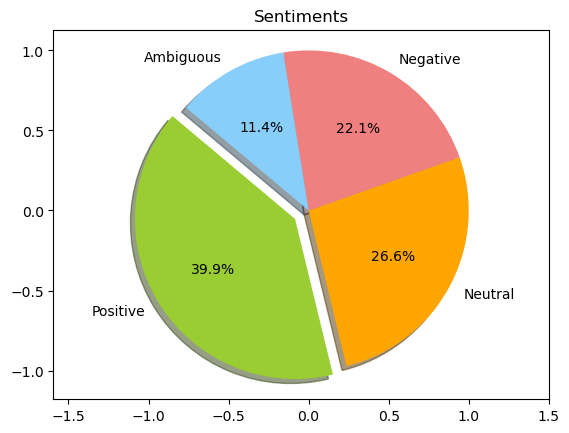

In [272]:
# Create list as variables for pie chart to dispay proportions of sentiments
sentiment_list = ["Positive", "Neutral", "Negative", "Ambiguous"]
sentiment_tally = [82938, 55298, 45991, 23587]
colors = ["yellowgreen", "orange", "lightcoral", "lightskyblue"]
explode = (0.1, 0, 0, 0)

# Create a pie chart using matplotlib based on the above data
sentiment_count = dfClean['Sentiment'].value_counts()
print("The rated emotions and their corresponding sentiments are as follows:\n", 
"--------------------------------------------------","\n",
sentiment_count)
plt.pie(sentiment_count, explode=explode, labels=sentiment_list, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140, frame=True)
plt.title("Sentiments")
plt.axis("equal")
plt.savefig("/Users/mdcummings/Desktop/Data Analysis/Boot Camp/Project 1/SentimentsPie.png")
plt.show()



In [268]:
# Adding another column to display the emotion chosen by the rater
emo_map_yin = [
    (dfClean['amusement'] == 1),
    (dfClean['excitement'] == 1),
    (dfClean['joy'] == 1),
    (dfClean['love'] == 1),
    (dfClean['desire'] == 1),
    (dfClean['optimism'] == 1),
    (dfClean['caring'] == 1),
    (dfClean['pride'] == 1),
    (dfClean['admiration'] == 1),
    (dfClean['gratitude'] == 1),
    (dfClean['relief'] == 1),
    (dfClean['approval'] == 1),
    (dfClean['realization'] == 1),
    (dfClean['surprise'] == 1),
    (dfClean['curiosity'] == 1),
    (dfClean['confusion'] == 1),
    (dfClean['fear'] == 1),
    (dfClean['nervousness'] == 1),
    (dfClean['remorse'] == 1),
    (dfClean['embarrassment'] == 1),
    (dfClean['disappointment'] == 1),
    (dfClean['sadness'] == 1),
    (dfClean['grief'] == 1),
    (dfClean['disgust'] == 1),
    (dfClean['anger'] == 1),
    (dfClean['annoyance'] == 1),
    (dfClean['disapproval'] == 1),
    (dfClean['neutral'] == 1)
]

emo_map_yang = ['Amusement', 'Excitement', 'Joy', 'Love', 'Desire', 'Optimism', 'Caring',
              'Pride', 'Admiration', 'Gratitude', 'Relief', 'Approval',
               'Realization', 'Surprise','Curiosity','Confusion',
               'Fear', 'Nervousness', 'Remorse', 'Embarrassment', 'Disappointment', 'Sadness', 'Grief',
               'Disgust', 'Anger', 'Annoyance', 'Disapproval', 'Neutral']
dfClean['Emotion'] = np.select(emo_map_yin, emo_map_yang)
dfClean

,text,subreddit,created_utc,rater_id,admiration,amusement,anger,annoyance,approval,caring,...,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,Emotion
0,That game hurt.,nrl,2019-01-25 01:50:39,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Sadness
2,"You do right, if you don't care then fuck 'em!",confessions,2019-01-02 11:15:44,37,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Neutral
3,Man I love reddit.,facepalm,2019-01-20 06:17:34,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Love
4,"[NAME] was nowhere near them, he was by the Fa...",starwarsspeculation,2019-01-05 06:10:01,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Neutral
5,Right? Considering it’s such an important docu...,TrueReddit,2019-01-23 21:50:08,61,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gratitude
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,"Well, I'm glad you're out of all that now. How...",raisedbynarcissists,2019-01-04 15:22:34,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Joy
211220,Everyone likes [NAME].,heroesofthestorm,2019-01-16 10:25:22,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Love
211221,Well when you’ve imported about a gazillion of...,nottheonion,2019-01-27 01:39:42,15,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,Caring
211222,That looks amazing,shittyfoodporn,2019-01-17 00:08:54,70,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Admiration


In [132]:
# Find the number of ratings for all emotions rated (including neutral ratings)
emotion_count = dfClean['Emotion'].value_counts()
# emotion_count = pd.DataFrame(emotion_count)
emotion_count.head(40)



Neutral           55298
Admiration        14046
Approval          13333
Amusement          9245
Annoyance          9174
Gratitude          8726
Disapproval        7686
Optimism           7516
Curiosity          7356
Love               7329
Joy                6816
Disappointment     6544
Realization        6468
Anger              6450
Confusion          5527
Excitement         5464
Caring             5023
Sadness            4250
Surprise           4236
Disgust            3998
Desire             3454
Fear               2639
Remorse            1952
Embarrassment      1880
Nervousness        1046
Pride              1018
Relief              968
Grief               372
Name: Emotion, dtype: int64

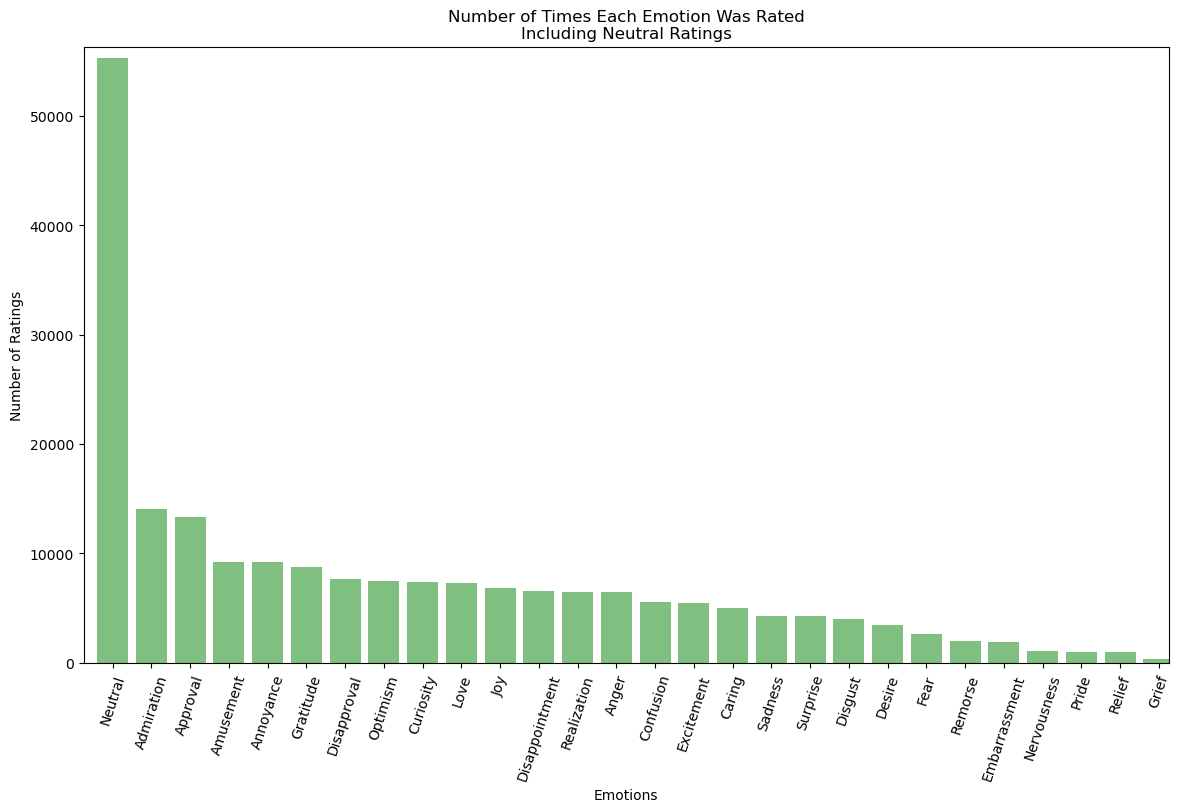

In [248]:
# Situate the 'emotion_count' dataframe into a bar chart showing rates for all emotions and Neutral rates
x_axis = np.arange(len(emotion_count)) 
fig, ax = plt.subplots(figsize=(14,8))
plt.bar(x_axis, emotion_count, color='g', alpha=0.5, align="center")
plt.xlim(-0.75, len(x_axis)-0.75)
plt.ylim(0, max(emotion_count)+1000)
plt.title("Number of Times Each Emotion Was Rated\nIncluding Neutral Ratings")
plt.xlabel("Emotions")
plt.ylabel("Number of Ratings")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Neutral', 'Admiration', 'Approval', 'Amusement', 'Annoyance', 'Gratitude', 'Disapproval',
              'Optimism', 'Curiosity', 'Love', 'Joy', 'Disappointment',
               'Realization', 'Anger','Confusion','Excitement',
               'Caring', 'Sadness', 'Surprise', 'Disgust', 'Desire', 'Fear', 'Remorse',
               'Embarrassment', 'Nervousness', 'Pride', 'Relief', 'Grief'])
plt.xticks(rotation = 72)
plt.show()

In [201]:
# Find the number of ratings for all emotions rated (excluding Neutral ratings)
emotion_count = dfClean['Emotion'].value_counts()
# emo_count_no_neu = pd.DataFrame(emotion_count)
emo_count_no_neu = emotion_count.drop('Neutral')
emo_count_no_neu.head(40)

Admiration        14046
Approval          13333
Amusement          9245
Annoyance          9174
Gratitude          8726
Disapproval        7686
Optimism           7516
Curiosity          7356
Love               7329
Joy                6816
Disappointment     6544
Realization        6468
Anger              6450
Confusion          5527
Excitement         5464
Caring             5023
Sadness            4250
Surprise           4236
Disgust            3998
Desire             3454
Fear               2639
Remorse            1952
Embarrassment      1880
Nervousness        1046
Pride              1018
Relief              968
Grief               372
Name: Emotion, dtype: int64

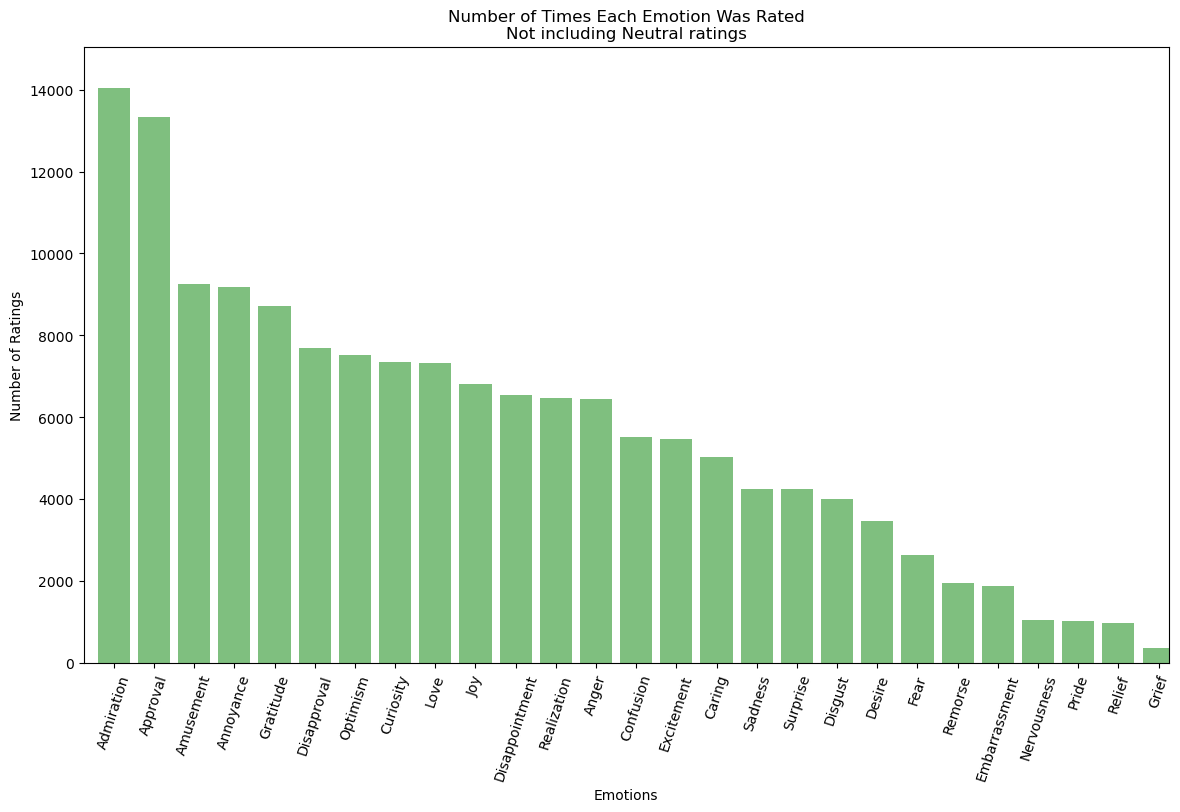

In [249]:
# Situate the 'emotion_count' dataframe into a bar chart showing 
x_axis = np.arange(len(emo_count_no_neu)) 
fig, ax = plt.subplots(figsize=(14,8))
plt.bar(x_axis, emo_count_no_neu, color='g', alpha=0.5, align="center")
plt.xlim(-0.75, len(x_axis)-0.75)
plt.ylim(0, max(emo_count_no_neu)+1000)
plt.title("Number of Times Each Emotion Was Rated\nNot including Neutral ratings")
plt.xlabel("Emotions")
plt.ylabel("Number of Ratings")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Admiration', 'Approval', 'Amusement', 'Annoyance', 'Gratitude', 'Disapproval',
              'Optimism', 'Curiosity', 'Love', 'Joy', 'Disappointment',
               'Realization', 'Anger','Confusion','Excitement',
               'Caring', 'Sadness', 'Surprise', 'Disgust', 'Desire', 'Fear', 'Remorse',
               'Embarrassment', 'Nervousness', 'Pride', 'Relief', 'Grief'])
plt.xticks(rotation = 72)
plt.show()

In [270]:
# End Michael's code - go down 2 cells
# CODE FROM ALDO ### CODE FROM ALDO ###
# Find the number of Neutral ratings per subreddit

subreddit_sentiments = dfClean[["text", "subreddit", "Sentiment"]]
subreddit_sentiments

KeyError: "['Sentiment'] not in index"

In [ ]:
# CODE FROM ALDO ### CODE FROM ALDO ###
# Importing "CountsSubredditCat.csv" into a DataFrame, check pathing for errors!
SubredditCatDF = pd.read_csv("/Users/mdcummings/Desktop/Data Analysis/Boot Camp/Project 1/CountsSubredditCat.csv")

# Clean by dropping columns and renaming
SubredditCatClean = SubredditCatDF.drop(columns = ['Subscribers', 'Responses','Notes', '77', 'Discussion', '"General" discussion'])
SubredditCatClean.rename(columns={"Subreddit": "subreddit"}, inplace=True)
SubredditCatClean.head(50)

In [269]:
# CODE FROM ALDO ### CODE FROM ALDO ###
# Merge cleaned catDataFrame into main DataFrame
dfCleanStaging = dfClean.merge(SubredditCatClean)

# Dropping Emotion matrix as we have their emotion listed under "Emotion" column.
dfCleanStagingA = dfCleanStaging.drop(columns = ['amusement', 'excitement', 'joy', 'love', 'desire', 'optimism', 'caring',\
                                                'pride', 'admiration', 'gratitude', 'relief', 'approval',\
                                                'realization', 'surprise','curiosity','confusion',\
                                                'fear', 'nervousness', 'remorse', 'embarrassment', 'disappointment', 'sadness', 'grief',\
                                                'disgust', 'anger', 'annoyance', 'disapproval', 'neutral'])

# Rearranging columns by placing subreddit next to subgroup
dfCleanStagingB = dfCleanStagingA[['text', 'subreddit', 'Grouping', 'created_utc', 'rater_id', 'Sentiment', 'Emotion']]

# Renaming titles for readability
dfCleanStagingB.rename(columns = {"text":"Text", "subreddit": "Subreddit", "Grouping":"Group", "created_utc":"UTC", "rater_id":"Rater ID"}, inplace=True)
dfCleanStagingB.head(50)

KeyError: "['Sentiment'] not in index"

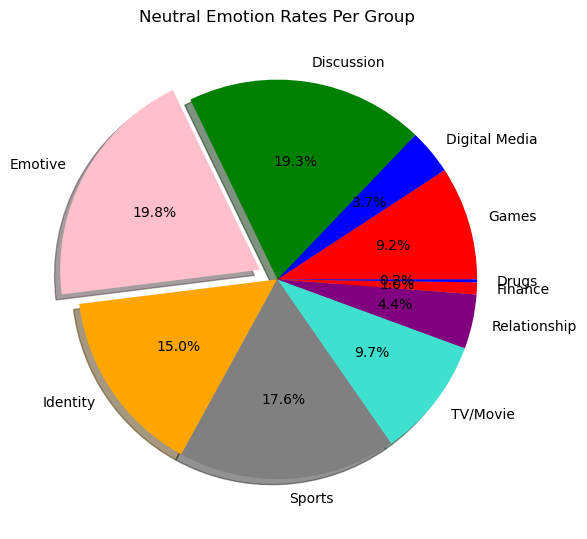

In [258]:
# Begin Michael's code
# Establishing a variable from the groups that rated neutral
dfCS_neu_games= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Neutral') & (dfCleanStagingB['Group']=='games')]
dfCS_neu_sports= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Neutral') & (dfCleanStagingB['Group']=='sports')]
dfCS_neu_emotive= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Neutral') & (dfCleanStagingB['Group']=='emotive')]
dfCS_neu_tv_movie= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Neutral') & (dfCleanStagingB['Group']=='television movie')]
dfCS_neu_disc= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Neutral') & (dfCleanStagingB['Group']=='discussion')]
dfCS_neu_relation= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Neutral') & (dfCleanStagingB['Group']=='relationship')]
dfCS_neu_identity= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Neutral') & (dfCleanStagingB['Group']=='identity')]
dfCS_neu_dig_media= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Neutral') & (dfCleanStagingB['Group']=='digital media')]
dfCS_neu_finance= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Neutral') & (dfCleanStagingB['Group']=='finance')]
dfCS_neu_drugs=dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Neutral') & (dfCleanStagingB['Group']=='drugs')]

# Converting the variables into integers from their length
neutral_games_df = len(dfCS_neu_games)
neutral_sports_df = len(dfCS_neu_sports)
neutral_emotive_df = len(dfCS_neu_emotive)
neutral_tv_movie_df = len(dfCS_neu_tv_movie)
neutral_discuss_df = len(dfCS_neu_disc)
neutral_relation_df = len(dfCS_neu_relation)
neutral_identity_df = len(dfCS_neu_identity)
neutral_dig_media_df = len(dfCS_neu_dig_media)
neutral_finance_df = len(dfCS_neu_finance)
neutral_drugs_df = len(dfCS_neu_drugs)


# Creating a lists for the amount, label and color of the pie chart
neutral_list = [neutral_games_df, neutral_dig_media_df, neutral_discuss_df,
                neutral_emotive_df, neutral_identity_df, neutral_sports_df,
                 neutral_tv_movie_df, neutral_relation_df, neutral_finance_df, neutral_drugs_df]
colors = ['red', 'blue', 'green', 'pink', 'orange', 'grey', 'turquoise', 'purple']
labels = ["Games", "Digital Media", "Discussion", "Emotive", "Identity", "Sports", "TV/Movie", "Relationship", "Finance", "Drugs"]
explode = (0,0,0,0.1,0,0,0,0,0,0)
fig, ax = plt.subplots(figsize=(6, 6))

# Creating a pie chart representing the amount of neutral ratings each group received 
plt.pie(neutral_list, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Neutral Emotion Rates Per Group") 
plt.tight_layout()


plt.show()







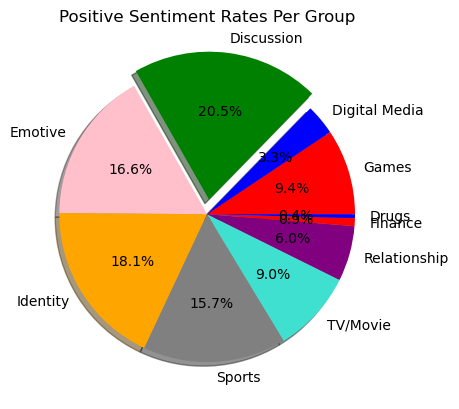

In [261]:
# Establishing a variable from the groups that rated Positive
dfCS_pos_games= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Positive') & (dfCleanStagingB['Group']=='games')]
dfCS_pos_sports= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Positive') & (dfCleanStagingB['Group']=='sports')]
dfCS_pos_emotive= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Positive') & (dfCleanStagingB['Group']=='emotive')]
dfCS_pos_tv_movie= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Positive') & (dfCleanStagingB['Group']=='television movie')]
dfCS_pos_disc= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Positive') & (dfCleanStagingB['Group']=='discussion')]
dfCS_pos_relation= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Positive') & (dfCleanStagingB['Group']=='relationship')]
dfCS_pos_identity= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Positive') & (dfCleanStagingB['Group']=='identity')]
dfCS_pos_dig_media= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Positive') & (dfCleanStagingB['Group']=='digital media')]
dfCS_pos_finance= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Positive') & (dfCleanStagingB['Group']=='finance')]
dfCS_pos_drugs=dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Positive') & (dfCleanStagingB['Group']=='drugs')]


# Converting the variables into integers from their length
pos_games_df = len(dfCS_pos_games)
pos_sports_df = len(dfCS_pos_sports)
pos_emotive_df = len(dfCS_pos_emotive)
pos_tv_movie_df = len(dfCS_pos_tv_movie)
pos_discuss_df = len(dfCS_pos_disc)
pos_relation_df = len(dfCS_pos_relation)
pos_identity_df = len(dfCS_pos_identity)
pos_dig_media_df = len(dfCS_pos_dig_media)
pos_finance = len(dfCS_pos_finance)
pos_drugs = len(dfCS_pos_drugs)


# Creating a lists for the amount, label and color of the pie chart
positive_list = [pos_games_df, pos_dig_media_df, pos_discuss_df,
                pos_emotive_df, pos_identity_df, pos_sports_df,
                 pos_tv_movie_df, pos_relation_df, pos_finance, pos_drugs]
colors = ['red', 'blue', 'green', 'pink', 'orange', 'grey', 'turquoise', 'purple']
labels = ["Games", "Digital Media", "Discussion", "Emotive", "Identity", "Sports", "TV/Movie", "Relationship","Finance", "Drugs"]
explode = (0,0,0.1,0,0,0,0,0,0,0)



# Creating a pie chart representing the amount of neutral ratings each group received 
plt.pie(positive_list, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Positive Sentiment Rates Per Group")


plt.show()

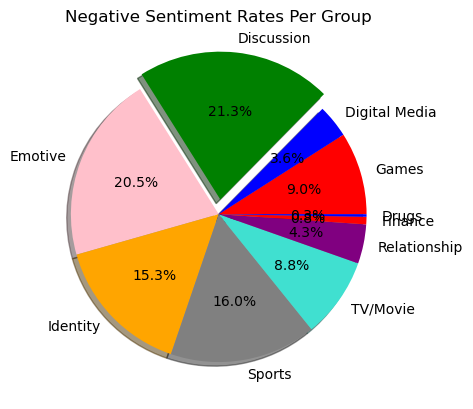

In [264]:
# Establishing a variable from the groups that rated Negative
dfCS_neg_games= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Negative') & (dfCleanStagingB['Group']=='games')]
dfCS_neg_sports= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Negative') & (dfCleanStagingB['Group']=='sports')]
dfCS_neg_emotive= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Negative') & (dfCleanStagingB['Group']=='emotive')]
dfCS_neg_tv_movie= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Negative') & (dfCleanStagingB['Group']=='television movie')]
dfCS_neg_disc= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Negative') & (dfCleanStagingB['Group']=='discussion')]
dfCS_neg_relation= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Negative') & (dfCleanStagingB['Group']=='relationship')]
dfCS_neg_identity= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Negative') & (dfCleanStagingB['Group']=='identity')]
dfCS_neg_dig_media= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Negative') & (dfCleanStagingB['Group']=='digital media')]
dfCS_neg_finance= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Negative') & (dfCleanStagingB['Group']=='finance')]
dfCS_neg_drugs= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Negative') & (dfCleanStagingB['Group']=='drugs')]

# Converting the variables into integers from their length
neg_games_df = len(dfCS_neg_games)
neg_sports_df = len(dfCS_neg_sports)
neg_emotive_df = len(dfCS_neg_emotive)
neg_tv_movie_df = len(dfCS_neg_tv_movie)
neg_discuss_df = len(dfCS_neg_disc)
neg_relation_df = len(dfCS_neg_relation)
neg_identity_df = len(dfCS_neg_identity)
neg_dig_media_df = len(dfCS_neg_dig_media)
neg_finance = len(dfCS_neg_finance)
neg_drugs = len(dfCS_neg_drugs)

# Creating a lists for the amount, label and color of the pie chart
negative_list = [neg_games_df, neg_dig_media_df, neg_discuss_df,
                neg_emotive_df, neg_identity_df, neg_sports_df,
                 neg_tv_movie_df, neg_relation_df, neg_finance, neg_drugs]
colors = ['red', 'blue', 'green', 'pink', 'orange', 'grey', 'turquoise', 'purple']
labels = ["Games", "Digital Media", "Discussion", "Emotive", "Identity", "Sports", "TV/Movie", "Relationship","Finance", "Drugs"]
explode = (0,0,0.1,0,0,0,0,0,0,0)


# Creating a pie chart representing the amount of neutral ratings each group received 
plt.pie(negative_list, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Negative Sentiment Rates Per Group")


plt.show()

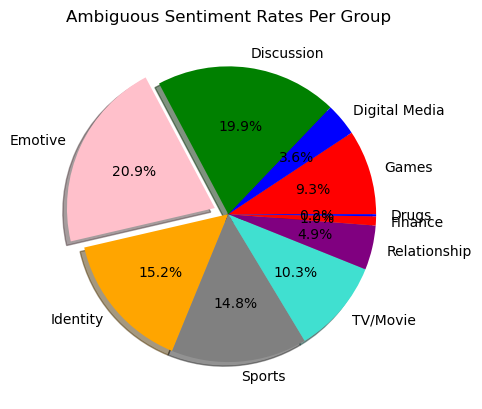

In [262]:
# Establishing a variable from the groups that rated Ambiguous
dfCS_amb_games= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Ambiguous') & (dfCleanStagingB['Group']=='games')]
dfCS_amb_sports= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Ambiguous') & (dfCleanStagingB['Group']=='sports')]
dfCS_amb_emotive= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Ambiguous') & (dfCleanStagingB['Group']=='emotive')]
dfCS_amb_tv_movie= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Ambiguous') & (dfCleanStagingB['Group']=='television movie')]
dfCS_amb_disc= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Ambiguous') & (dfCleanStagingB['Group']=='discussion')]
dfCS_amb_relation= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Ambiguous') & (dfCleanStagingB['Group']=='relationship')]
dfCS_amb_identity= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Ambiguous') & (dfCleanStagingB['Group']=='identity')]
dfCS_amb_dig_media= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Ambiguous') & (dfCleanStagingB['Group']=='digital media')]
dfCS_amb_finance= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Ambiguous') & (dfCleanStagingB['Group']=='finance')]
dfCS_amb_drug= dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Ambiguous') & (dfCleanStagingB['Group']=='drugs')]

# Converting the variables into integers from their length
amb_games_df = len(dfCS_amb_games)
amb_sports_df = len(dfCS_amb_sports)
amb_emotive_df = len(dfCS_amb_emotive)
amb_tv_movie_df = len(dfCS_amb_tv_movie)
amb_discuss_df = len(dfCS_amb_disc)
amb_relation_df = len(dfCS_amb_relation)
amb_identity_df = len(dfCS_amb_identity)
amb_dig_media_df = len(dfCS_amb_dig_media)
amb_finance_df = len(dfCS_amb_finance)
amb_drug_df = len(dfCS_amb_drug)

# Creating a lists for the amount, label and color of the pie chart
ambiguous_list = [amb_games_df, amb_dig_media_df, amb_discuss_df,
                amb_emotive_df, amb_identity_df, amb_sports_df,
                 amb_tv_movie_df, amb_relation_df, amb_finance_df, amb_drug_df]
colors = ['red', 'blue', 'green', 'pink', 'orange', 'grey', 'turquoise', 'purple']
labels = ["Games", "Digital Media", "Discussion", "Emotive", "Identity", "Sports", "TV/Movie", "Relationship","Finance", "Drugs"]
explode = (0,0,0,0.1,0,0,0,0,0,0)

# Creating a pie chart representing the amount of neutral ratings each group received 
plt.pie(ambiguous_list, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Ambiguous Sentiment Rates Per Group")


plt.show()

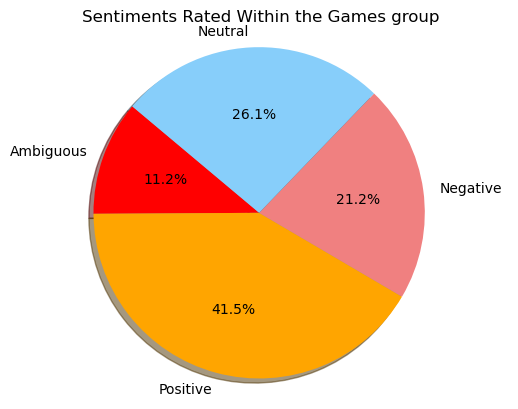

In [257]:
# Pie chart showing the breakdown of sentiments from the ratings for the group Games
amb_games_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Ambiguous') & (dfCleanStagingB['Group']=='games')]
pos_games_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Positive') & (dfCleanStagingB['Group']=='games')]
neg_games_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Negative') & (dfCleanStagingB['Group']=='games')]
neu_games_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Neutral') & (dfCleanStagingB['Group']=='games')]

#Getting the length to see how many ratings each has
amb_clean_count = len(amb_games_clean)
pos_clean_count = len(pos_games_clean)
neg_clean_count = len(neg_games_clean)
neu_clean_count = len(neu_games_clean)

# Establishing labels for the sections of the pie chart
labels = ["Ambiguous", "Positive", "Negative", "Neutral"]

# Colors of each slice
colors = ["red", "orange", "lightcoral", "lightskyblue"]

# The values of each section of the pie chart
games_sizes = [amb_clean_count, pos_clean_count, neg_clean_count, neu_clean_count]

# Create pie chart based on above values
plt.pie(games_sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Sentiments Rated Within the Games group")
plt.axis("equal")
plt.show()




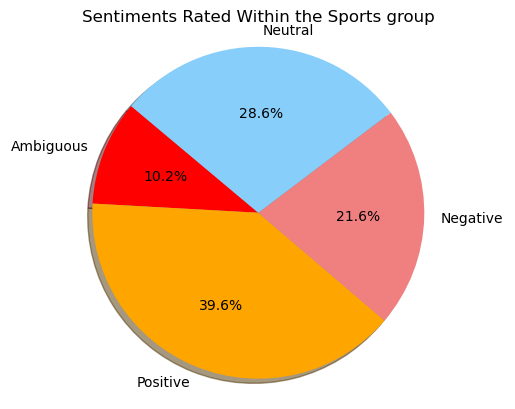

In [218]:
# Pie chart showing the breakdown of sentiments from the ratings for the group Sports
amb_sports_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Ambiguous') & (dfCleanStagingB['Group']=='sports')]
pos_sports_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Positive') & (dfCleanStagingB['Group']=='sports')]
neg_sports_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Negative') & (dfCleanStagingB['Group']=='sports')]
neu_sports_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Neutral') & (dfCleanStagingB['Group']=='sports')]

#Getting the length to see how many ratings each has
amb_sports_count = len(amb_sports_clean)
pos_sports_count = len(pos_sports_clean)
neg_sports_count = len(neg_sports_clean)
neu_sports_count = len(neu_sports_clean)

# Establishing labels for the sections of the pie chart
labels = ["Ambiguous", "Positive", "Negative", "Neutral"]

# Colors of each slice
colors = ["red", "orange", "lightcoral", "lightskyblue"]

# The values of each section of the pie chart
sports_sizes = [amb_sports_count, pos_sports_count, neg_sports_count, neu_sports_count]

# Create pie chart based on above values
plt.pie(sports_sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Sentiments Rated Within the Sports group")
plt.axis("equal")
plt.show()

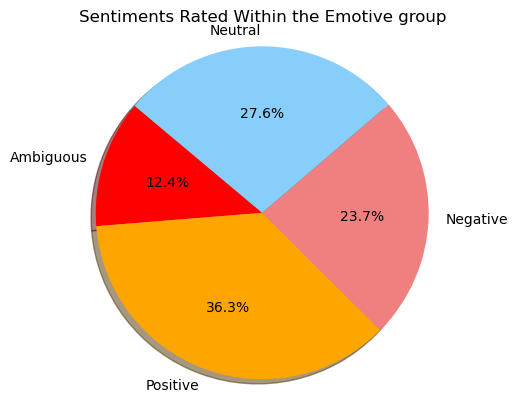

In [219]:
# Pie chart showing the breakdown of sentiments from the ratings for the group Emotive
amb_emotive_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Ambiguous') & (dfCleanStagingB['Group']=='emotive')]
pos_emotive_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Positive') & (dfCleanStagingB['Group']=='emotive')]
neg_emotive_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Negative') & (dfCleanStagingB['Group']=='emotive')]
neu_emotive_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Neutral') & (dfCleanStagingB['Group']=='emotive')]

#Getting the length to see how many ratings each has
amb_emo_count = len(amb_emotive_clean)
pos_emo_count = len(pos_emotive_clean)
neg_emo_count = len(neg_emotive_clean)
neu_emo_count = len(neu_emotive_clean)

# Establishing labels for the sections of the pie chart
labels = ["Ambiguous", "Positive", "Negative", "Neutral"]

# Colors of each slice
colors = ["red", "orange", "lightcoral", "lightskyblue"]

# The values of each section of the pie chart
emo_sizes = [amb_emo_count, pos_emo_count, neg_emo_count, neu_emo_count]

# Create pie chart based on above values
plt.pie(emo_sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Sentiments Rated Within the Emotive group")
plt.axis("equal")
plt.show()

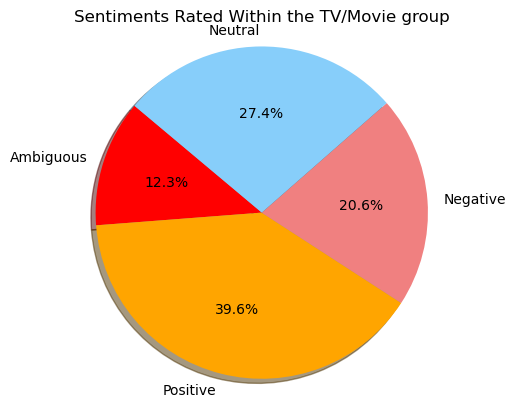

In [220]:
# Pie chart showing the breakdown of sentiments from the ratings for the group Television/Movie
amb_tv_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Ambiguous') & (dfCleanStagingB['Group']=='television movie')]
pos_tv_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Positive') & (dfCleanStagingB['Group']=='television movie')]
neg_tv_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Negative') & (dfCleanStagingB['Group']=='television movie')]
neu_tv_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Neutral') & (dfCleanStagingB['Group']=='television movie')]

#Getting the length to see how many ratings each has
amb_tv_count = len(amb_tv_clean)
pos_tv_count = len(pos_tv_clean)
neg_tv_count = len(neg_tv_clean)
neu_tv_count = len(neu_tv_clean)

# Establishing labels for the sections of the pie chart
labels = ["Ambiguous", "Positive", "Negative", "Neutral"]

# Colors of each slice
colors = ["red", "orange", "lightcoral", "lightskyblue"]

# The values of each section of the pie chart
tv_sizes = [amb_tv_count, pos_tv_count, neg_tv_count, neu_tv_count]

# Create pie chart based on above values
plt.pie(tv_sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Sentiments Rated Within the TV/Movie group")
plt.axis("equal")
plt.show()

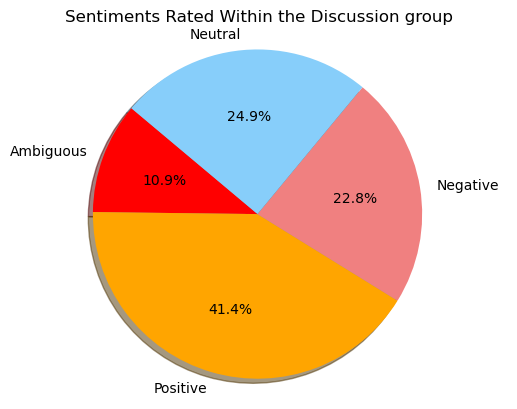

In [221]:
# Pie chart showing the breakdown of sentiments from the ratings for the group Discussion
amb_disc_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Ambiguous') & (dfCleanStagingB['Group']=='discussion')]
pos_disc_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Positive') & (dfCleanStagingB['Group']=='discussion')]
neg_disc_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Negative') & (dfCleanStagingB['Group']=='discussion')]
neu_disc_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Neutral') & (dfCleanStagingB['Group']=='discussion')]

#Getting the length to see how many ratings each has
amb_disc_count = len(amb_disc_clean)
pos_disc_count = len(pos_disc_clean)
neg_disc_count = len(neg_disc_clean)
neu_disc_count = len(neu_disc_clean)

# Establishing labels for the sections of the pie chart
labels = ["Ambiguous", "Positive", "Negative", "Neutral"]

# Colors of each slice
colors = ["red", "orange", "lightcoral", "lightskyblue"]

# The values of each section of the pie chart
disc_sizes = [amb_disc_count, pos_disc_count, neg_disc_count, neu_disc_count]

# Create pie chart based on above values
plt.pie(disc_sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Sentiments Rated Within the Discussion group")
plt.axis("equal")
plt.show()

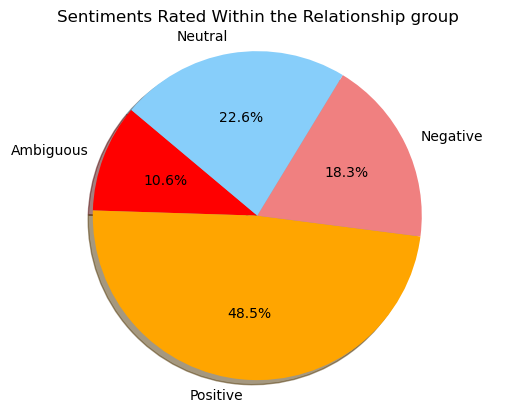

In [222]:
# Pie chart showing the breakdown of sentiments from the ratings for the group Relationship
amb_rel_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Ambiguous') & (dfCleanStagingB['Group']=='relationship')]
pos_rel_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Positive') & (dfCleanStagingB['Group']=='relationship')]
neg_rel_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Negative') & (dfCleanStagingB['Group']=='relationship')]
neu_rel_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Neutral') & (dfCleanStagingB['Group']=='relationship')]

#Getting the length to see how many ratings each has
amb_rel_count = len(amb_rel_clean)
pos_rel_count = len(pos_rel_clean)
neg_rel_count = len(neg_rel_clean)
neu_rel_count = len(neu_rel_clean)

# Establishing labels for the sections of the pie chart
labels = ["Ambiguous", "Positive", "Negative", "Neutral"]

# Colors of each slice
colors = ["red", "orange", "lightcoral", "lightskyblue"]

# The values of each section of the pie chart
rel_sizes = [amb_rel_count, pos_rel_count, neg_rel_count, neu_rel_count]

# Create pie chart based on above values
plt.pie(rel_sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Sentiments Rated Within the Relationship group")
plt.axis("equal")
plt.show()

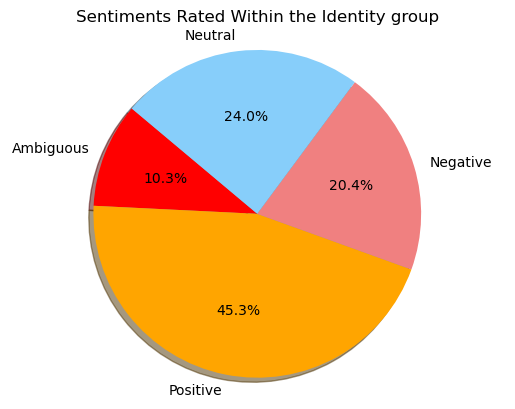

In [223]:
# Pie chart showing the breakdown of sentiments from the ratings for the group Identity
amb_id_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Ambiguous') & (dfCleanStagingB['Group']=='identity')]
pos_id_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Positive') & (dfCleanStagingB['Group']=='identity')]
neg_id_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Negative') & (dfCleanStagingB['Group']=='identity')]
neu_id_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Neutral') & (dfCleanStagingB['Group']=='identity')]

#Getting the length to see how many ratings each has
amb_id_count = len(amb_id_clean)
pos_id_count = len(pos_id_clean)
neg_id_count = len(neg_id_clean)
neu_id_count = len(neu_id_clean)

# Establishing labels for the sections of the pie chart
labels = ["Ambiguous", "Positive", "Negative", "Neutral"]

# Colors of each slice
colors = ["red", "orange", "lightcoral", "lightskyblue"]

# The values of each section of the pie chart
id_sizes = [amb_id_count, pos_id_count, neg_id_count, neu_id_count]

# Create pie chart based on above values
plt.pie(id_sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Sentiments Rated Within the Identity group")
plt.axis("equal")
plt.show()

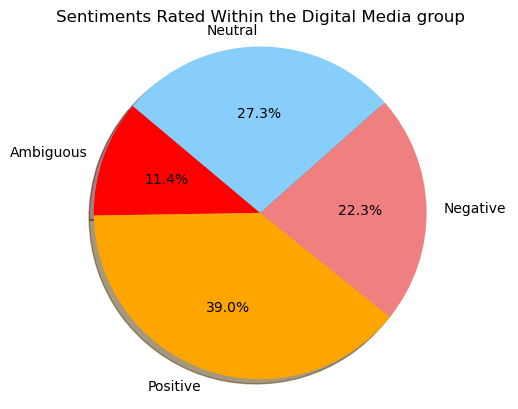

In [224]:
# Pie chart showing the breakdown of sentiments from the ratings for the group Digital Media
amb_dm_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Ambiguous') & (dfCleanStagingB['Group']=='digital media')]
pos_dm_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Positive') & (dfCleanStagingB['Group']=='digital media')]
neg_dm_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Negative') & (dfCleanStagingB['Group']=='digital media')]
neu_dm_clean = dfCleanStagingB.loc[(dfCleanStagingB['Sentiment']=='Neutral') & (dfCleanStagingB['Group']=='digital media')]

#Getting the length to see how many ratings each has
amb_dm_count = len(amb_dm_clean)
pos_dm_count = len(pos_dm_clean)
neg_dm_count = len(neg_dm_clean)
neu_dm_count = len(neu_dm_clean)

# Establishing labels for the sections of the pie chart
labels = ["Ambiguous", "Positive", "Negative", "Neutral"]

# Colors of each slice
colors = ["red", "orange", "lightcoral", "lightskyblue"]

# The values of each section of the pie chart
dm_sizes = [amb_dm_count, pos_dm_count, neg_dm_count, neu_dm_count]

# Create pie chart based on above values
plt.pie(dm_sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Sentiments Rated Within the Digital Media group")
plt.axis("equal")
plt.show()

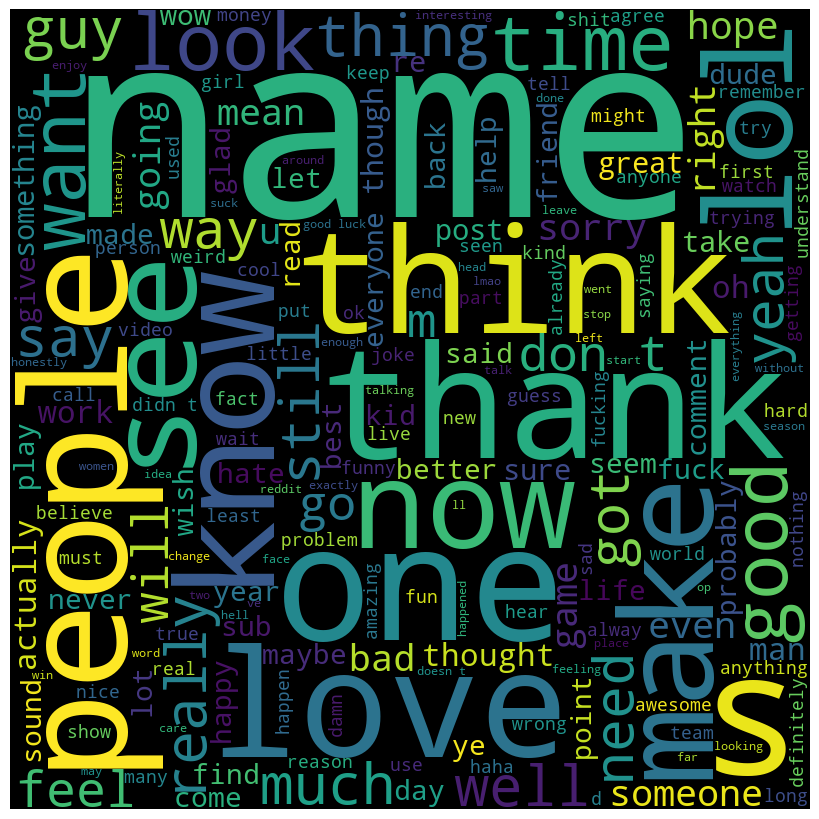

In [246]:
# wordcloud using WordCloud and STOPWORDS
# https://www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the data frame
for val in dfClean.text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


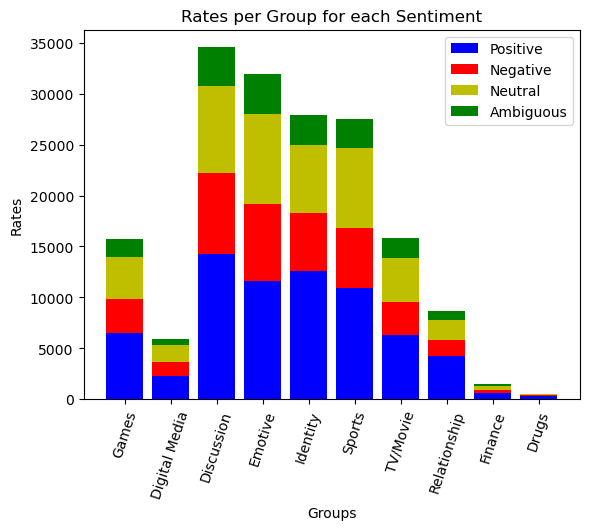

In [267]:
# Converging list of rates per Sentiment into a stacked bar chart
#https://www.geeksforgeeks.org/create-a-stacked-bar-plot-in-matplotlib/

# create data
labels = ["Games", "Digital Media", "Discussion", "Emotive", "Identity", "Sports", "TV/Movie", "Relationship", "Finance", "Drugs"]
pos = np.array(positive_list)
neg = np.array(negative_list)
neu = np.array(neutral_list)
amb = np.array(ambiguous_list)
 
# plot bars in stack manner
plt.bar(labels, pos, color='b')
plt.bar(labels, neg, bottom=pos, color='r')
plt.bar(labels, neu, bottom=pos+neg, color='y')
plt.bar(labels, amb, bottom=pos+neg+neu, color='g')
plt.xlabel("Groups")
plt.ylabel("Rates")
plt.legend(["Positive", "Negative", "Neutral", "Ambiguous"])
plt.title("Rates per Group for each Sentiment")
plt.xticks(rotation = 72)
plt.savefig("/Users/mdcummings/Desktop/Data Analysis/Boot Camp/Project 1/RPG_Sentiments_stacked_bar.png", bbox_inches='tight')

plt.show()

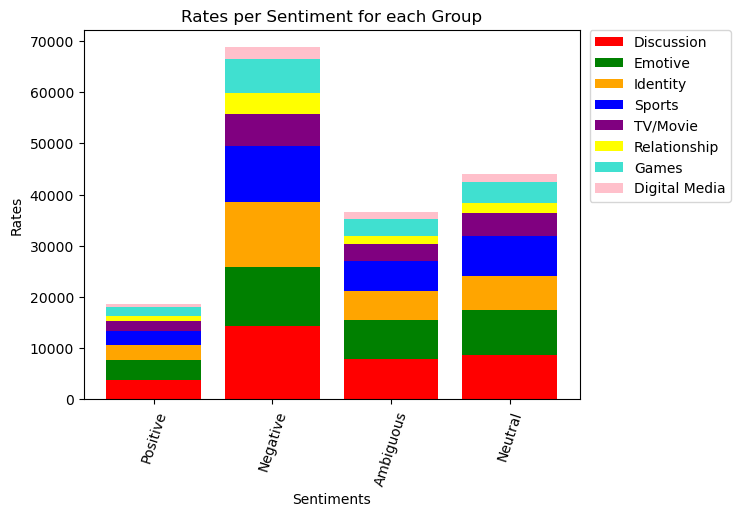

In [241]:
# Converging list of rates per Sentiment into a stacked bar chart
#https://www.geeksforgeeks.org/create-a-stacked-bar-plot-in-matplotlib/

# create data
labels = ["Positive", "Negative", "Ambiguous", "Neutral"]
disc = np.array(disc_sizes)
emo = np.array(emo_sizes)
iden = np.array(id_sizes)
sports = np.array(sports_sizes)
tv_movie = np.array(tv_sizes)
rela = np.array(rel_sizes)
games = np.array(games_sizes)
dig_media = np.array(dm_sizes)
 
    
    
    
# plot bars in stack manner
plt.bar(labels, disc, color='red')
plt.bar(labels, emo, bottom=disc, color='green')
plt.bar(labels, iden, bottom=disc+emo, color='orange')
plt.bar(labels, sports, bottom=disc+emo+iden, color='blue')
plt.bar(labels, tv_movie, bottom=disc+emo+iden+sports, color='purple')
plt.bar(labels, rela, bottom=disc+emo+iden+sports+tv_movie, color='yellow')
plt.bar(labels, games, bottom=disc+emo+iden+sports+tv_movie+rela, color='turquoise')
plt.bar(labels, dig_media, bottom=disc+emo+iden+sports+tv_movie+rela+games, color='pink')
# plt.bar(labels, amb, bottom=disc+emo+iden+sports+tv_movie+rela+games+dig_media, color='grey')

plt.xlabel("Sentiments")
plt.ylabel("Rates")
plt.legend(["Discussion", "Emotive", "Identity", "Sports", "TV/Movie", 'Relationship', 'Games', 'Digital Media'],bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Rates per Sentiment for each Group")
plt.xticks(rotation = 72)
plt.savefig("/Users/mdcummings/Desktop/Data Analysis/Boot Camp/Project 1/RPS_Group_stacked_bar.png",bbox_inches='tight')

plt.show()